### M Kevin Alrahmanto

# TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans, DBSCAN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, FastICA

# 1. Simple regression

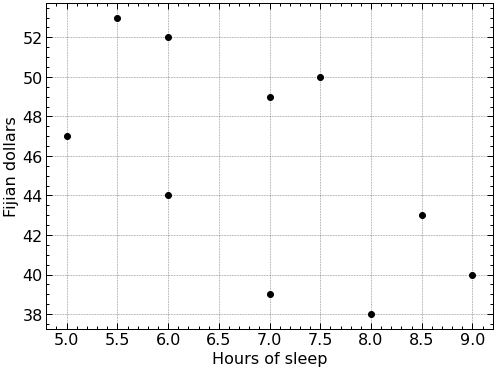

In [3]:
## example: effects of sleep on food spending

sleepHours = [5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]
dollars = [47, 53, 52, 44, 39, 49, 50, 38, 43, 40]

# start by showing the data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')
plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [4]:
## "manual" regression via least-squares fitting

# create the design matrix
desmat = np.vstack((np.ones(10),sleepHours)).T
print(desmat)

# compute the beta parameters (regression coefficients)
beta = np.linalg.lstsq(desmat,dollars,rcond=None)[0]
print(beta)

# predicted data values
yHat = desmat@beta

[[1.  5. ]
 [1.  5.5]
 [1.  6. ]
 [1.  6. ]
 [1.  7. ]
 [1.  7. ]
 [1.  7.5]
 [1.  8. ]
 [1.  8.5]
 [1.  9. ]]
[62.84737679 -2.49602544]


In [5]:
X=np.array([np.ones(len(sleepHours)), sleepHours]).T
y=np.array(dollars)
np.linalg.inv(X.T@X)@(X.T@y)

array([62.84737679, -2.49602544])

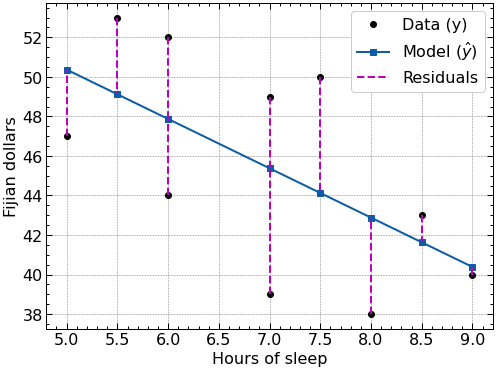

In [6]:
## show the predicted results on top of the "real" data

# show previous data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')

# predicted results
plt.plot(sleepHours,yHat,'s-')

# show the residuals
for i in range(10):
    plt.plot([sleepHours[i],sleepHours[i]],[dollars[i], yHat[i]],'m--')
    

plt.legend(('Data (y)','Model ($\^{y}$)','Residuals'))

plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()  

In [7]:
## now with scipy

slope,intercept,r,p,std_err = stats.linregress(sleepHours,dollars)
print(intercept,slope)
print(beta)

62.84737678855326 -2.496025437201908
[62.84737679 -2.49602544]


# 2. Multiple regression

In [8]:
## example: effects of sleep and study hours on exam scores
### create the data

exam_scores = []
for ei in range(5):
    exam_scores = np.hstack((exam_scores,60*np.ones(6)+np.linspace(-1,5,6)*ei))
    print(exam_scores)

hours_studied = np.tile(np.linspace(2,8,6),5)
ave_sleep_hrs = np.linspace(6,10,30)

[60. 60. 60. 60. 60. 60.]
[60.  60.  60.  60.  60.  60.  59.  60.2 61.4 62.6 63.8 65. ]
[60.  60.  60.  60.  60.  60.  59.  60.2 61.4 62.6 63.8 65.  58.  60.4
 62.8 65.2 67.6 70. ]
[60.  60.  60.  60.  60.  60.  59.  60.2 61.4 62.6 63.8 65.  58.  60.4
 62.8 65.2 67.6 70.  57.  60.6 64.2 67.8 71.4 75. ]
[60.  60.  60.  60.  60.  60.  59.  60.2 61.4 62.6 63.8 65.  58.  60.4
 62.8 65.2 67.6 70.  57.  60.6 64.2 67.8 71.4 75.  56.  60.8 65.6 70.4
 75.2 80. ]


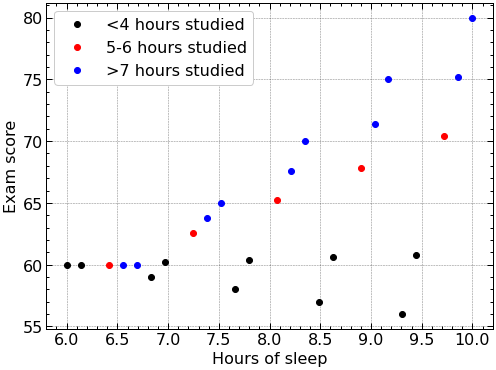

In [9]:
## plot the data

### stratify by hours studied

# fewer than 4 hours studied
plotidx = hours_studied<4.1
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ko',markerfacecolor='k')

# 5-6 hours studied
plotidx = np.logical_and(hours_studied>4.9, hours_studied<6.1)
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ro',markerfacecolor='r')

# more than 6 hours
plotidx = hours_studied>6
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'bo',markerfacecolor='b')

plt.xlabel('Hours of sleep')
plt.ylabel('Exam score')
plt.legend(('<4 hours studied','5-6 hours studied','>7 hours studied'))
plt.show()

In [10]:
## multiple regression 

# build the design matrix
desmat = np.vstack((np.ones((30,)),ave_sleep_hrs,hours_studied,ave_sleep_hrs*hours_studied)).T

multireg = sm.OLS(endog=exam_scores, exog=desmat).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1182.
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           6.74e-28
Time:                        21:29:25   Log-Likelihood:                -21.269
No. Observations:                  30   AIC:                             50.54
Df Residuals:                      26   BIC:                             56.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.4315      1.700     48.491      0.000      78.937      85.926
x1            -3.4511      0.215    -16.087      0.000      -3.892      -3.010
x2            -7.6663      0.321    -23.916      0.000      -8.325      -7.007
x3             1.1736      0.040     29.623      0.000       1.092       1.255
==============================================================================
Omnibus:                       10.899   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.273
Skew:                          -0.438   Prob(JB):                        0.195
Kurtosis:                       1.640   Cond. No.                         821.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# inspect the correlations of the IVs
np.corrcoef(desmat[:,1:].T)

array([[1.        , 0.19731231, 0.49270769],
       [0.19731231, 1.        , 0.94068915],
       [0.49270769, 0.94068915, 1.        ]])

# 3. Polynomial regression

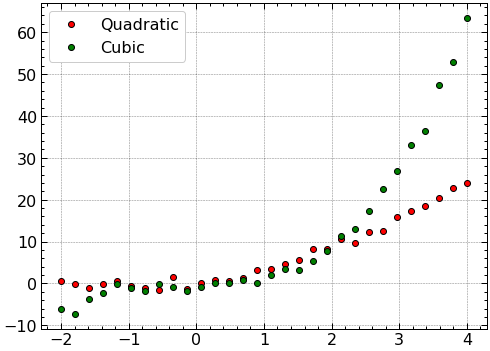

In [12]:
## generate the data

n  = 30
x  = np.linspace(-2,4,n)
y1 = x**2+2*x + np.random.randn(n)
y2 = x**3 + np.random.randn(n)


# plot the data
plt.plot(x,y1,'ko',markerfacecolor='r')
plt.plot(x,y2,'ko',markerfacecolor='g')
plt.legend(('Quadratic','Cubic'))
plt.show()

[1.02752205 1.98378488 0.25850355]
[ 0.8787462   0.33727399  0.41836006 -0.46982621]


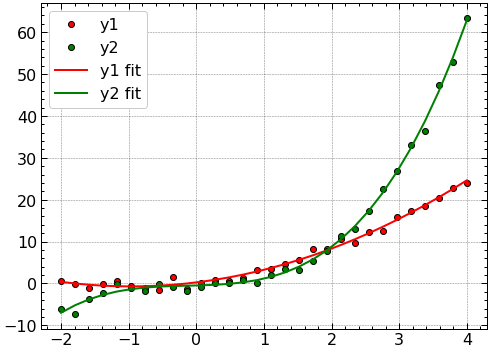

In [13]:
## now for a polynomial fit

# for y1
pterms = np.polyfit(x,y1,2)
yHat1 = np.polyval(pterms,x)
print(pterms)
# for y2
pterms = np.polyfit(x,y2,3)
yHat2 = np.polyval(pterms,x)
print(pterms)
# and all the plotting
plt.plot(x,y1,'ko',markerfacecolor='r',label='y1')
plt.plot(x,y2,'ko',markerfacecolor='g',label='y2')

plt.plot(x,yHat1,'r',label='y1 fit')
plt.plot(x,yHat2,'g',label='y2 fit')
plt.legend()
plt.show()

In [14]:
# compute R2

# compute R2 for several polynomial orders
orders = np.arange(1,6)

# output matrices
r2 = np.zeros((2,len(orders)))
sse = np.zeros((2,len(orders)))

# the loop!
for oi in range(len(orders)):
    
    # fit the model with oi terms
    pterms = np.polyfit(x,y1,orders[oi])
    yHat = np.polyval(pterms,x)
    
    # compute R2
    ss_eta = sum((y1-yHat)**2)  # numerator
    ss_tot = sum((y1-np.mean(y1))**2)  # denominator
    r2[0,oi] = 1 - ss_eta/ss_tot  # R^2
    sse[0,oi] = ss_eta  # store just the SSe for model comparison later
    
    
    ### repeat for y2
    pterms = np.polyfit(x,y2,orders[oi])
    yHat   = np.polyval(pterms,x)
    ss_eta = sum((y2-yHat)**2)
    ss_tot = np.var(y2)*(n-1)
    r2[1,oi] = 1 - ss_eta/ss_tot
    sse[1,oi] = ss_eta

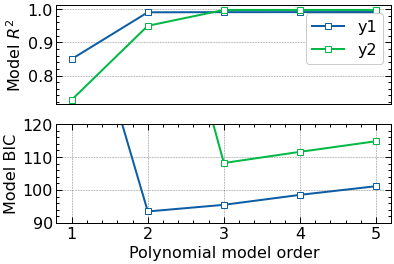

In [15]:
fig,ax = plt.subplots(2,1,figsize=(6,4))

# plot the R2 results
ax[0].plot(orders,r2[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))



# compute the Bayes Information Criterion BIC BIC BIC BIC
bic = n*np.log(sse) + orders*np.log(n)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1,6))
ax[1].set_ylabel('Model BIC')

# optional zoom
ax[1].set_ylim([90,120])

plt.show()

In [16]:
bic

array([[172.19731264,  93.47188749,  95.4888498 ,  98.51089755,
        101.14065396],
       [240.06250384, 192.75388581, 108.17701839, 111.57236726,
        114.79322604]])

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\1590650552.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pterms2 = np.linalg.lstsq(desmat2, y2,)[0][::-1]
C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\1590650552.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pterms3 = np.linalg.lstsq(desmat3, y3,)[0][::-1]


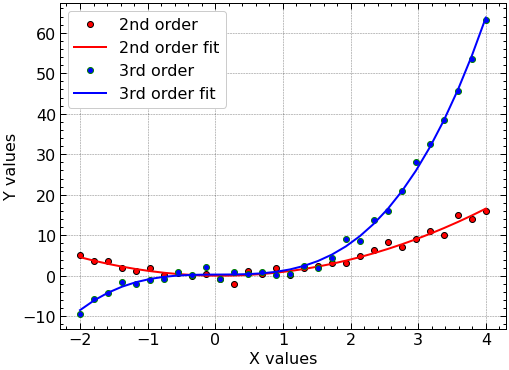

In [17]:
## generate the data
n  = 30
x  = np.linspace(-2,4,n)
y2 = x**2 + np.random.randn(n)
y3 = x**3 + np.random.randn(n)
 
 
# 2nd order design Matrix
desmat2 = np.vstack((np.ones(n), x, x**2)).T
# fitting 2nd order polynomial
pterms2 = np.linalg.lstsq(desmat2, y2,)[0][::-1]
# predict fitting values
yHat2 = pterms2[len(pterms2)-1] + pterms2[len(pterms2)-2]*x + pterms2[len(pterms2)-3]*x**2
 
# 3rd order design Matrix
desmat3 = np.vstack((np.ones(n), x, x**2, x**3)).T
# fitting 3rd order polynomial
pterms3 = np.linalg.lstsq(desmat3, y3,)[0][::-1]
# predict fitting values
yHat3 = pterms3[len(pterms3)-1] + pterms3[len(pterms3)-2]*x + pterms3[len(pterms3)-3]*x**2 + + pterms3[len(pterms3)-4]*x**3
 
 
#ploting
plt.plot(x,y2,'ko',markerfacecolor='r',label='2nd order')
plt.plot(x,yHat2,'r',label='2nd order fit')
 
plt.plot(x,y3,'go',markerfacecolor='b',label='3rd order')
plt.plot(x,yHat3,'b',label='3rd order fit')
 
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

Second Order Polynomial Regression
---------------------------------
Betas solved with linear algebra: [ 0.06960438 -0.01574866  0.97115327]
Betas solved with np.polyfit: [ 0.06960438 -0.01574866  0.97115327]

Third Order Polynomial Regression
---------------------------------
Betas solved with linear algebra: [ 0.23787013  0.10390336 -0.14366356  1.03211994]
Betas solved with np.polyfit: [ 0.23787013  0.10390336 -0.14366356  1.03211994]


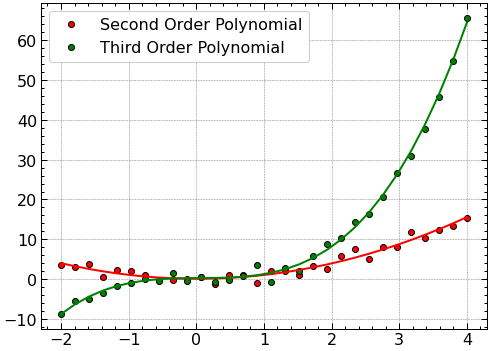

In [18]:
import numpy as np
 
n  = 30
x  = np.linspace(-2,4,n)
 
y2 = x**2 + np.random.randn(n)
y3 = x**3 + np.random.randn(n)
 
# design matrices
X2 = np.vstack([np.ones(len(x)), x, x**2]).T
X3 = np.vstack([np.ones(len(x)), x, x**2, x**3]).T
 
# solve for Betas lin alg
XTX2 = X2.T @ X2
XTX2inv = np.linalg.inv(XTX2)
B2 = XTX2inv @ X2.T @ y2
pterms2 = np.polyfit(x, y2, 2)
 
print("Second Order Polynomial Regression\n---------------------------------")
print("Betas solved with linear algebra:", B2)
print("Betas solved with np.polyfit:", pterms2[::-1])
 
# solve for Betas lin alg
XTX3 = X3.T @ X3
XTX3inv = np.linalg.inv(XTX3)
B3 = XTX3inv @ X3.T @ y3
pterms3 = np.polyfit(x, y3, 3)
 
print("\nThird Order Polynomial Regression\n---------------------------------")
print("Betas solved with linear algebra:", B3)
print("Betas solved with np.polyfit:", pterms3[::-1])
 
# best fit lines
y2hat = X2 @ B2
y3hat = X3 @ B3
 
# plot the points
plt.figure(figsize=(8,6))
plt.plot(x,y2,'ko',markerfacecolor='r')
plt.plot(x,y3,'ko',markerfacecolor='g')
 
# plot the fitted line
plt.plot(x, y2hat, 'r-')
plt.plot(x, y3hat, 'g-')
plt.legend(["Second Order Polynomial", "Third Order Polynomial"])
plt.show()

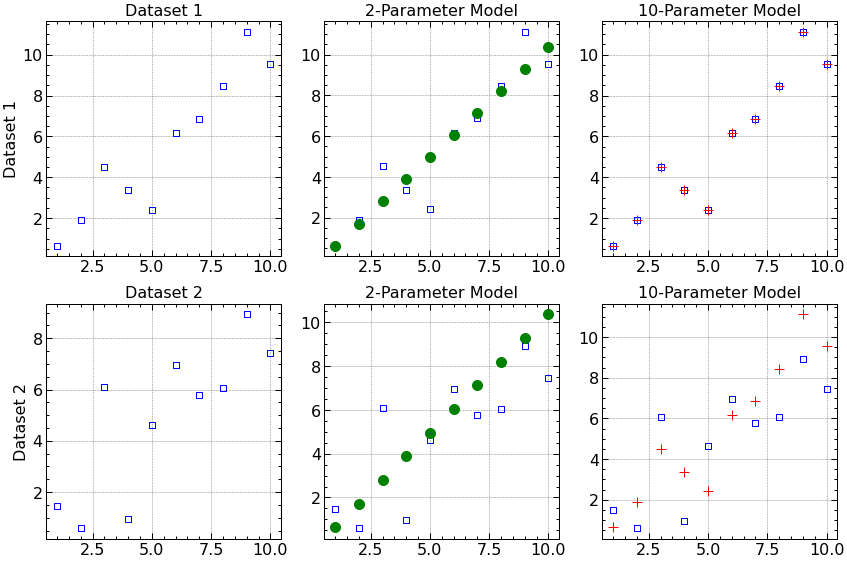

In [19]:
# generate Dataset-1
x = np.linspace(1,10,10)
y = x + np.random.randn(len(x))*1.5
x = x.reshape((-1, 1))
 
# Dataset-1: 1st order polynomial (2-parameter model) fitting
x_1_deg2 = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x)
model_1_deg2 = LinearRegression().fit(x_1_deg2, y)
y_pred_1_deg2 = model_1_deg2.predict(x_1_deg2)
 
# Dataset-1: 9th order polynomial (10-parameter model) fitting
x_1_deg10 = PolynomialFeatures(degree=9, include_bias=False).fit_transform(x)
model_1_deg10 = LinearRegression().fit(x_1_deg10, y)
y_pred_1_deg10 = model_1_deg10.predict(x_1_deg10)
 
 
# generate Dataset-2
x2 = np.linspace(1,10,10)
y2 = x2 + np.random.randn(len(x2))*1.5
x2 = x2.reshape((-1, 1))
 
# Dataset-2: 1st order polynomial (2-parameter model) prediction from previous model
# no LinearRegression fitting!
x_2_deg2 = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x2)
y_pred_2_deg2 = model_1_deg2.predict(x_2_deg2)
 
# Dataset-2: 9th order polynomial (10-parameter model) prediction from previous model
# no LinearRegression fitting!
x_2_deg10 = PolynomialFeatures(degree=9, include_bias=False).fit_transform(x2)
y_pred_2_deg10 = model_1_deg10.predict(x_2_deg10)
 
#ploting
fig, ax = plt.subplots(2,3, figsize=(12,8))
ax[0,0].scatter(x, y, marker='s', facecolor='None', edgecolors='b')
ax[0,0].set_title('Dataset 1')
ax[0,0].set_ylabel('Dataset 1')
 
ax[0,1].scatter(x, y, marker='s', facecolor='None', edgecolors='b')
ax[0,1].plot(x, y_pred_1_deg2, 'og', markersize=10)
ax[0,1].set_title('2-Parameter Model')
 
ax[0,2].scatter(x, y, marker='s', facecolor='None', edgecolors='b')
ax[0,2].plot(x, y_pred_1_deg10, '+r', markersize=10)
ax[0,2].set_title('10-Parameter Model')
 
 
ax[1,0].scatter(x2, y2, marker='s', facecolor='None', edgecolors='b')
ax[1,0].set_title('Dataset 2')
ax[1,0].set_ylabel('Dataset 2')
 
ax[1,1].scatter(x2, y2, marker='s', facecolor='None', edgecolors='b')
ax[1,1].plot(x2, y_pred_2_deg2, 'og', markersize=10)
ax[1,1].set_title('2-Parameter Model')
 
ax[1,2].scatter(x2, y2, marker='s', facecolor='None', edgecolors='b')
ax[1,2].plot(x2, y_pred_2_deg10, '+r', markersize=10)
ax[1,2].set_title('10-Parameter Model')
 
plt.tight_layout()
plt.show()

# 4. Logistic regression

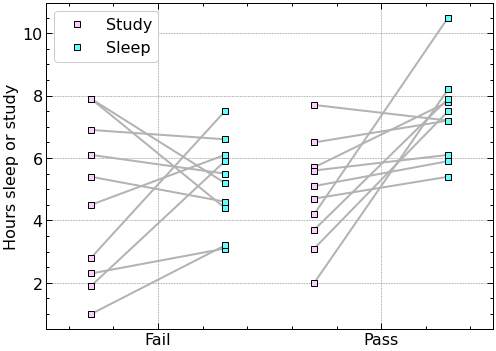

In [20]:
## generate the data

exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome)

# and plot
for i in range(n):
    plt.plot([exam_outcome[i]-.3, exam_outcome[i]+.3],[study_hours[i],sleep_hours[i]],color=[.7,.7,.7])

plt.plot(exam_outcome-.3*np.ones(n),study_hours,'ks',markerfacecolor=[1,.8,1],label='Study')
plt.plot(exam_outcome+.3*np.ones(n),sleep_hours,'ks',markerfacecolor=[.39,1,1],label='Sleep')

plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-.5,1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

In [21]:
## now for the logistic regression

# create a model
logregmodel = LogisticRegression(solver='saga')#'newton-cg')#

# create the design matrix
desmat = np.vstack((study_hours,sleep_hours)).T

logregmodel.fit(desmat,np.array(exam_outcome))

print(logregmodel.intercept_)
print(logregmodel.coef_)

[-1.51242961]
[[-0.16591852  0.39722439]]


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
# compute predictions and accuracy

predvals = logregmodel.predict(desmat) # class labels
predvalsP = logregmodel.predict_proba(desmat) # probability values

print(predvals)
print(np.array(exam_outcome))

print(predvalsP)

logregmodel.score(desmat,np.array(exam_outcome))

[0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[0.74562223 0.25437777]
 [0.6808366  0.3191634 ]
 [0.26851274 0.73148726]
 [0.64133369 0.35866631]
 [0.58414157 0.41585843]
 [0.45909021 0.54090979]
 [0.50889568 0.49110432]
 [0.65985466 0.34014534]
 [0.37379996 0.62620004]
 [0.60042352 0.39957648]
 [0.27840124 0.72159876]
 [0.34520471 0.65479529]
 [0.50462601 0.49537399]
 [0.53674239 0.46325761]
 [0.12329738 0.87670262]
 [0.19576551 0.80423449]
 [0.48250381 0.51749619]
 [0.43312423 0.56687577]
 [0.50374748 0.49625252]
 [0.26663858 0.73336142]]


0.7

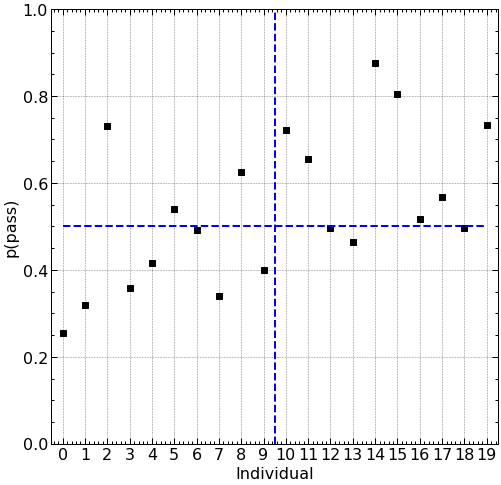

In [23]:
# plotting

fig,ax = plt.subplots(1,1,figsize=(8,8))

ax.plot(predvalsP[:,1],'ks')
ax.plot([0,19],[.5,.5],'b--')
ax.plot([9.5,9.5],[0,1],'b--')

ax.set_xticks(np.arange(20))
ax.set_xlabel('Individual')
ax.set_ylabel('p(pass)')
ax.set_xlim([-.5, 19.5])
ax.set_ylim([0,1])
plt.show()

# 5. K-Means

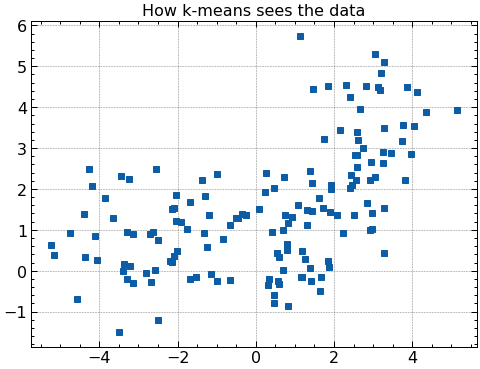

In [24]:
## Create data

nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
plt.plot(data[:,0],data[:,1],'s')
plt.title('How k-means sees the data')
plt.show()

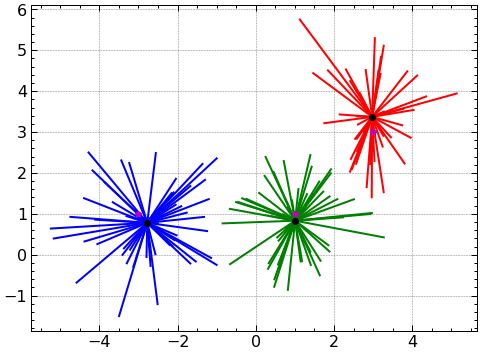

In [25]:
## k-means clustering

k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(data)):
    plt.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'mp')
plt.plot(B[0],B[1],'mp')
plt.plot(C[0],C[1],'mp')

plt.show()

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


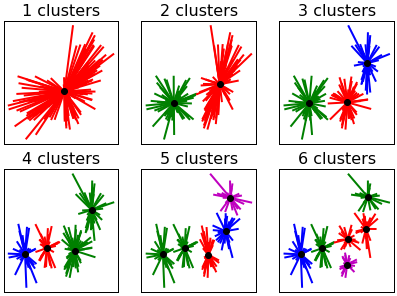

In [26]:
## determining the appropriate number of clusters (qualitative)

fig,ax = plt.subplots(2,3,figsize=(7,5))
ax = ax.flatten()

for k in range(6):
    
    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:,0],cents[:,1],'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\4079972229.py:6: RuntimeWarning: invalid value encountered in true_divide
  sils = np.zeros(7)/0
C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


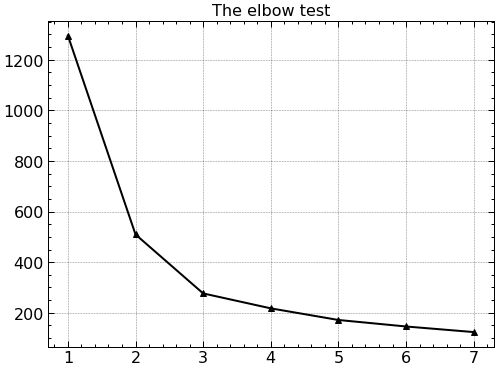

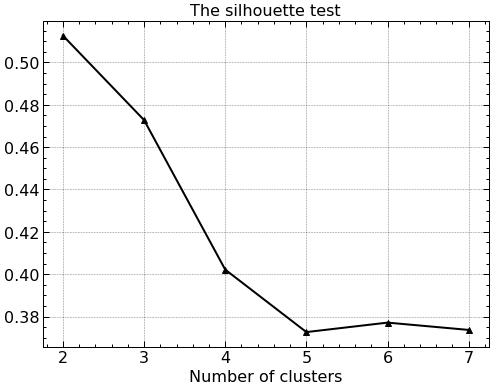

In [27]:
## number of clusters (quantative)

from sklearn.metrics import silhouette_samples, silhouette_score

ssds = np.zeros(7)
sils = np.zeros(7)/0

for k in range(7):
    kmeans = KMeans(n_clusters=k+1).fit(data)
    ssds[k] = np.mean(kmeans.inertia_)
    
    if k>0:
        s = silhouette_samples(data,kmeans.predict(data))
        sils[k] = np.mean( s )

plt.plot(np.arange(1,8),ssds,'k^-',markerfacecolor='k')
plt.title('The elbow test')
plt.show()

plt.plot(np.arange(1,8),sils,'k^-',markerfacecolor='k')
plt.title('The silhouette test')
plt.xlabel('Number of clusters')
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\2150109989.py:22: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


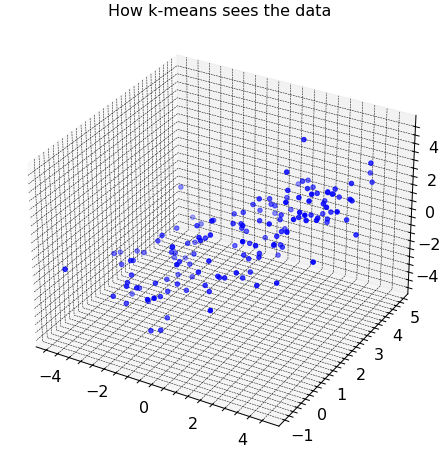

In [28]:
## Try again in 3D

nPerClust = 50

# blur around centroid (std units)
n = 1

# XY centroid locations
A = [  1, 2,  0 ]
B = [ -2, 1, -2 ]
C = [  3, 3,  2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*n , A[1]+np.random.randn(nPerClust)*n , A[2]+np.random.randn(nPerClust)*n ]
b = [ B[0]+np.random.randn(nPerClust)*n , B[1]+np.random.randn(nPerClust)*n , B[2]+np.random.randn(nPerClust)*n ]
c = [ C[0]+np.random.randn(nPerClust)*n , C[1]+np.random.randn(nPerClust)*n , C[2]+np.random.randn(nPerClust)*n ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
ax = Axes3D(plt.figure())
ax.scatter(data[:,0],data[:,1],data[:,2], c = 'b', marker='o')
plt.title('How k-means sees the data')
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\3071357782.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


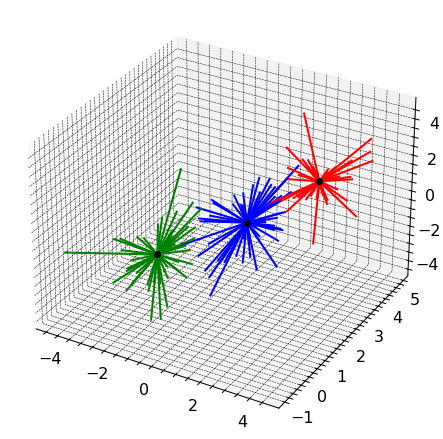

In [29]:
k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
ax = Axes3D(plt.figure())
for i in range(0,len(data)):
    ax.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],[ data[i,2],cents[groupidx[i],2] ],lineColors[groupidx[i]])

# and now plot the centroid locations
ax.plot(cents[:,0],cents[:,1],cents[:,2],'ko')

plt.show()

# 6. DBscan

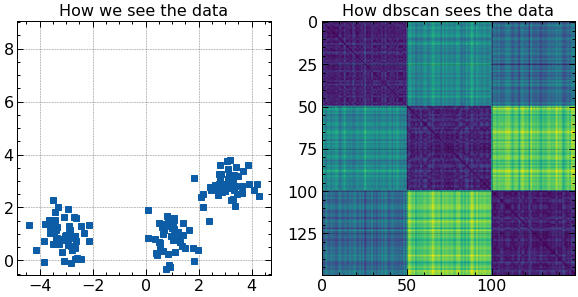

In [30]:
## Create data

nPerClust = 50

# blur around centroid (std units)
blur = .5

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].plot(data[:,0],data[:,1],'s')
ax[0].set_title('How we see the data')
ax[0].axis('square')


### distance matrix
D = np.zeros((len(data),len(data)))
for i in range(len(D)):
    for j in range(len(D)):
        D[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

ax[1].imshow(D)
ax[1].set_title('How dbscan sees the data')
plt.show()

[[ 0.96512043  0.84779191]
 [-3.07965538  0.98336796]
 [ 3.14192064  2.89699496]]


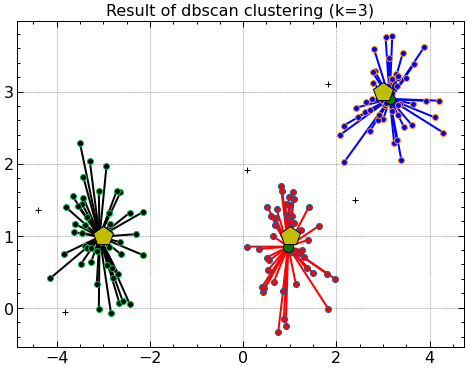

In [31]:
## dbscan

clustmodel = DBSCAN(eps=0.6,min_samples=6).fit(data)
groupidx = clustmodel.labels_

# number of clusters
nclust = max(groupidx)+1 # +1 for indexing

# compute cluster centers
cents = np.zeros((nclust,2))
for ci in range(nclust):
    cents[ci,0] = np.mean(data[groupidx==ci,0])
    cents[ci,1] = np.mean(data[groupidx==ci,1])
print(cents)

# draw lines from each data point to the centroids of each cluster
lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
for i in range(len(data)):
    if groupidx[i]==-1:
        plt.plot(data[i,0],data[i,1],'k+')
    else:
        plt.plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
        

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')

plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\2182183982.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aa,ax=ax[0])
C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\2182183982.py:38: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(aa,ax=ax[1])


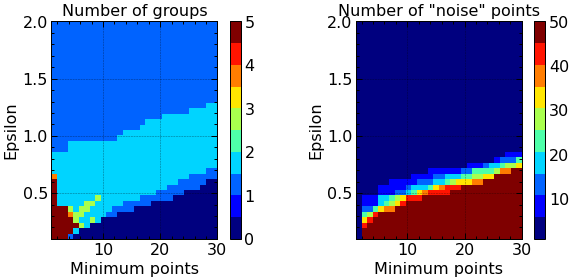

In [32]:
## testing the parameter space

# parameter ranges
epsilons = np.linspace(.1,2,40)
minpoints = np.arange(1,31)


# initialize results matrix
results = np.zeros((len(epsilons),len(minpoints),2))

for ei in range(len(epsilons)):
    for di in range(len(minpoints)):
        clustmodel = DBSCAN(eps=epsilons[ei],min_samples=minpoints[di]).fit(data)
        groupidx = clustmodel.labels_
        results[ei,di,0] = max(groupidx)
        results[ei,di,1] = sum(groupidx==-1)



# for colormap discretization
from pylab import cm

fig,ax = plt.subplots(1,2,figsize=(10,4))
aa = ax[0].imshow(results[:,:,0],vmin=0,vmax=5,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[0].set_xlabel('Minimum points')
ax[0].set_ylabel('Epsilon')
ax[0].set_title('Number of groups')
plt.colorbar(aa,ax=ax[0])

aa = ax[1].imshow(results[:,:,1],vmin=1,vmax=len(data)/3,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[1].set_xlabel('Minimum points')
ax[1].set_ylabel('Epsilon')
ax[1].set_title('Number of "noise" points')
plt.colorbar(aa,ax=ax[1])

plt.show()

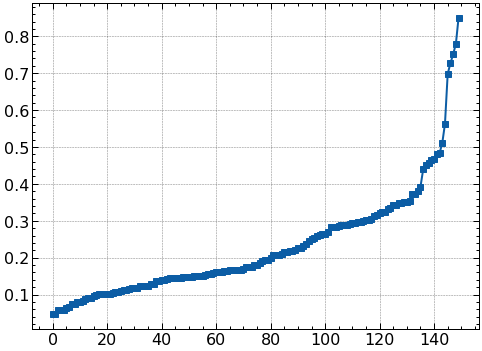

In [33]:
## determining the appropriate parameters

# NOTE: The thesis I linked in the video is no longer available. 
#    There are several methods to determine an appropriate epsilon
#    parameter, depending on the nature of the data and level of
#    sophistication required. I hope the references below are helpful; you
#    can also google around to find more tips for picking parameters.
# 
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
# https://core.ac.uk/download/pdf/219373759.pdf
# https://www.biorxiv.org/content/10.1101/2020.07.09.195784v2.full.pdf
 

D = np.zeros(len(data))

for i in range(len(data)):
    # compute distance
    d = np.sqrt( (data[i,0]-data[:,0])**2 + (data[i,1]-data[:,1])**2 )
    
    # distance to 3rd closest point
    d = np.sort(d)
    D[i] = d[2]
    
plt.plot(np.sort(D),'s-')
plt.show()

(2000, 2)


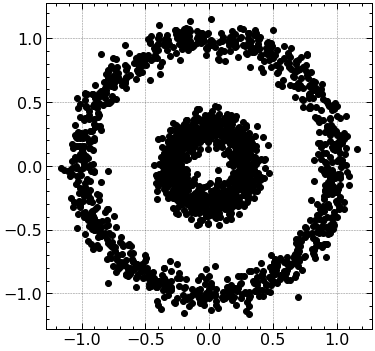

In [34]:
## Try again with nonlinear clusters

N = 1000
th = np.linspace(0,2*np.pi,N)

# create the two circles
data1 = np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15
data2 = .3*np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15

# put them together into one dataset
circdata = np.hstack((data1,data2)).T
print(np.shape(circdata))

# plot
plt.plot(circdata[:,0],circdata[:,1],'ko')
plt.axis('square')
plt.show()

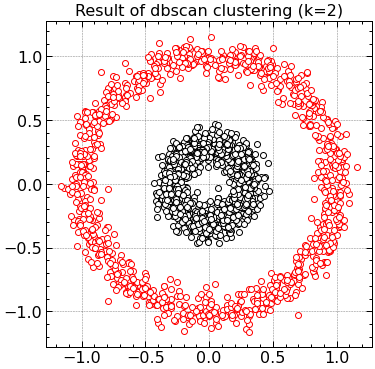

In [35]:
## dbscan

clustmodel = DBSCAN(eps=.2,min_samples=6).fit(circdata)
groupidx = clustmodel.labels_

nclust = max(groupidx)+1 # +1 for indexing

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(circdata[groupidx==i,0],circdata[groupidx==i,1],'o',color=lineColors[i],markerfacecolor='w')

# and plot unassigned data
plt.plot(circdata[groupidx==-1,0],circdata[groupidx==-1,1],'k+')
plt.axis('square')
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

plt.show()

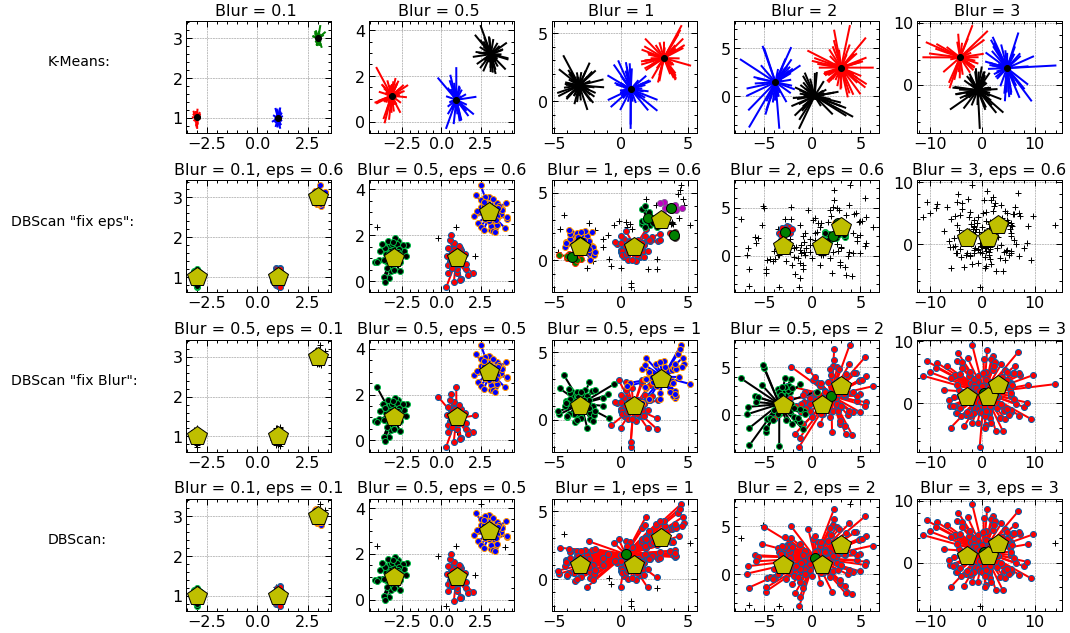

In [36]:
fig,ax = plt.subplots(4,6,figsize=(15,9))
ax = ax.flatten()
 
lineColors = 'rgbgmrkbgm';
 
blur_level=[0.1, 0.5, 1, 2, 3]
 
for k in range(6):
    if k == 0: 
        ax[k].axis('off')
        ax[k].annotate('K-Means:', xy=(0.3, 0.6), size=14)
        ax[k+6].axis('off')
        ax[k+6].annotate('DBScan "fix eps":', xy=(0.05, 0.6), size=14)
        ax[k+12].axis('off')
        ax[k+12].annotate('DBScan "fix Blur":', xy=(0.05, 0.6), size=14)
        ax[k+18].axis('off')
        ax[k+18].annotate('DBScan:', xy=(0.3, 0.6), size=14)
        continue    
            
    nPerClust = 50
 
    # blur around centroid (std units)
    blur = blur_level[k-1]
 
    # XY centroid locations
    A = [  1, 1 ]
    B = [ -3, 1 ]
    C = [  3, 3 ]
 
    # generate data
    a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
    b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
    c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]
 
    # concatanate into a list
    data = np.transpose( np.concatenate((a,b,c),axis=1) )
    
    kmeans = KMeans(n_clusters=3).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:,0],cents[:,1],'ko')
    #ax[k].set_xticks([])
    #ax[k].set_yticks([])
    ax[k].set_title('Blur = %g '%(blur))
    
    
    clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
    groupidx = clustmodel.labels_
 
    # number of clusters
    nclust = max(groupidx)+1 # +1 for indexing
 
    # compute cluster centers
    cents = np.zeros((nclust,2))
    for ci in range(nclust):
        cents[ci,0] = np.mean(data[groupidx==ci,0])
        cents[ci,1] = np.mean(data[groupidx==ci,1])
    #print(cents)
 
    # draw lines from each data point to the centroids of each cluster
    lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
    for i in range(len(data)):
        if groupidx[i]==-1:
            ax[k+6].plot(data[i,0],data[i,1],'k+')
        else:
            ax[k+6].plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
 
 
    # now draw the raw data in different colors
    for i in range(nclust):
        ax[k+6].plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])
 
    # and now plot the centroid locations
    ax[k+6].plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
    #ax[k].title('Result of dbscan clustering (k=' + str(nclust) + ')')
 
    # finally, the "ground-truth" centers
    ax[k+6].plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+6].plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+6].plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+6].set_title('Blur = %g, eps = 0.6'%(blur))
    
    
 
    blur_scan = 0.5
 
    # generate data
    a_scan = [ A[0]+np.random.randn(nPerClust)*blur_scan , A[1]+np.random.randn(nPerClust)*blur_scan ]
    b_scan = [ B[0]+np.random.randn(nPerClust)*blur_scan , B[1]+np.random.randn(nPerClust)*blur_scan ]
    c_scan = [ C[0]+np.random.randn(nPerClust)*blur_scan , C[1]+np.random.randn(nPerClust)*blur_scan ]
 
    # concatanate into a list
    data_scan = np.transpose( np.concatenate((a_scan,b_scan,c_scan),axis=1) )
 
    eps_k = blur_level[k-1]
    clustmodel = DBSCAN(eps=eps_k,min_samples=6).fit(data_scan)
    groupidx = clustmodel.labels_
 
    # number of clusters
    nclust = max(groupidx)+1 # +1 for indexing
 
    # compute cluster centers
    cents = np.zeros((nclust,2))
    for ci in range(nclust):
        cents[ci,0] = np.mean(data[groupidx==ci,0])
        cents[ci,1] = np.mean(data[groupidx==ci,1])
    #print(cents)
 
    # draw lines from each data point to the centroids of each cluster
    lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
    for i in range(len(data)):
        if groupidx[i]==-1:
            ax[k+12].plot(data[i,0],data[i,1],'k+')
        else:
            ax[k+12].plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
 
 
    # now draw the raw data in different colors
    for i in range(nclust):
        ax[k+12].plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])
 
    # and now plot the centroid locations
    ax[k+12].plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
    #ax[k].title('Result of dbscan clustering (k=' + str(nclust) + ')')
 
    # finally, the "ground-truth" centers
    ax[k+12].plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+12].plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+12].plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+12].set_title('Blur = %g, eps = %g'%(blur_scan, eps_k))
    
    
    
    
    eps_k = blur_level[k-1]
    clustmodel = DBSCAN(eps=eps_k,min_samples=6).fit(data)
    groupidx = clustmodel.labels_
 
    # number of clusters
    nclust = max(groupidx)+1 # +1 for indexing
 
    # compute cluster centers
    cents = np.zeros((nclust,2))
    for ci in range(nclust):
        cents[ci,0] = np.mean(data[groupidx==ci,0])
        cents[ci,1] = np.mean(data[groupidx==ci,1])
    #print(cents)
 
    # draw lines from each data point to the centroids of each cluster
    lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
    for i in range(len(data)):
        if groupidx[i]==-1:
            ax[k+18].plot(data[i,0],data[i,1],'k+')
        else:
            ax[k+18].plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
 
 
    # now draw the raw data in different colors
    for i in range(nclust):
        ax[k+18].plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])
 
    # and now plot the centroid locations
    ax[k+18].plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
    #ax[k].title('Result of dbscan clustering (k=' + str(nclust) + ')')
 
    # finally, the "ground-truth" centers
    ax[k+18].plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+18].plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+18].plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')
    ax[k+18].set_title('Blur = %g, eps = %g'%(blur, eps_k))
plt.tight_layout()

# 7. KNN

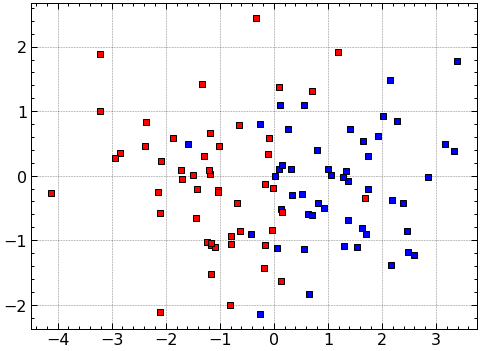

In [37]:
## Create data

nPerClust = 50

# XY centroid locations
A = [  1, 0 ]
B = [ -1, 0 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b),axis=1) )
grouplabels = np.concatenate((np.zeros(nPerClust),np.ones(nPerClust)))

# group color assignment
groupcolors = 'br'

# show the data
fig,ax = plt.subplots(1)
ax.plot(data[grouplabels==0,0],data[grouplabels==0,1],'ks',markerfacecolor=groupcolors[0])
ax.plot(data[grouplabels==1,0],data[grouplabels==1,1],'ks',markerfacecolor=groupcolors[1])
plt.show()

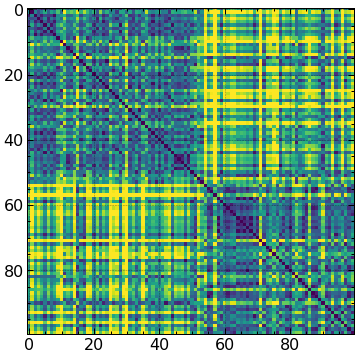

In [38]:
## compute distance matrix

# initialize
distmat = np.zeros((nPerClust*2,nPerClust*2))

# loop over elements
for i in range(nPerClust*2):
    for j in range(nPerClust*2):
        distmat[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

plt.imshow(distmat,vmax=4)
plt.show()

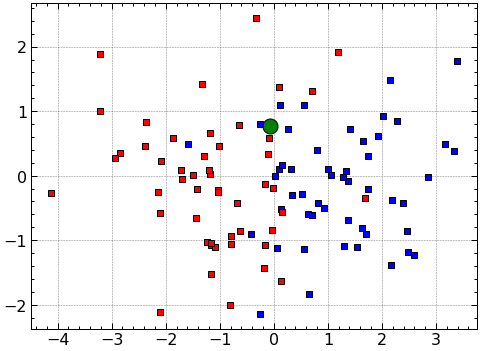

In [39]:
## create the new data point

# random new point
newpoint = 2*np.random.rand(2)-1

# and plot it
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
fig

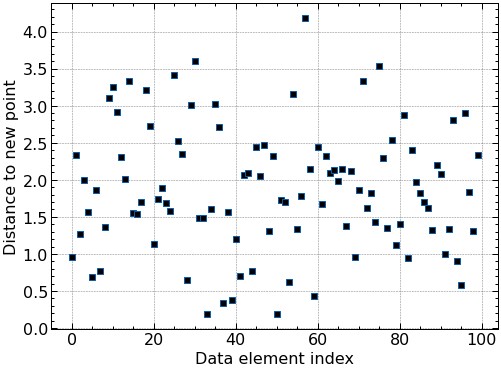

In [40]:
# compute distance vector
distvec = np.zeros(nPerClust*2)

for i in range(nPerClust*2):
    distvec[i] = np.sqrt( (data[i,0]-newpoint[0])**2 + (data[i,1]-newpoint[1])**2 )
    

# show the distances
plt.plot(distvec,'s',markerfacecolor='k')
plt.xlabel('Data element index')
plt.ylabel('Distance to new point')
plt.show()

[1. 0. 0.]
New data belong to group 0


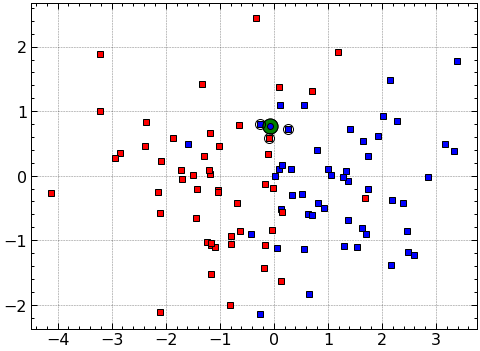

In [41]:
## now for the labeling

# k parameter
k = 3

# sort the distances
sortidx = np.argsort(distvec)

# find the group assignment of the nearest neighbors
print(grouplabels[sortidx[:k]])
whichgroup = int( np.median(grouplabels[sortidx[:k]]) )
print('New data belong to group ' + str(whichgroup))

# and re-plot
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor=groupcolors[whichgroup])
ax.plot(data[sortidx[:k],0],data[sortidx[:k],1],'ko',markersize=10,fillstyle='none')
fig

In [42]:
## now using Python functions
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(data,grouplabels)

whichgroupP = knn.predict(newpoint.reshape(1,-1))

print('New data belong to group ' + str(whichgroupP[0]))


New data belong to group 0.0


# 8. PCA

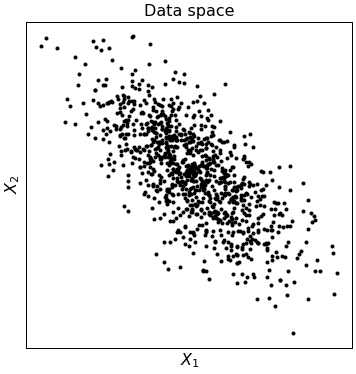

In [43]:
## Create the data

N = 1000

# data
x = np.array([ np.random.randn(N), .4*np.random.randn(N) ]).T

# rotation matrix
th = np.pi/4
R1 = [ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ]

# rotate data
y = x@np.array(R1)

axlim = [-1.1*max(abs(y.flatten())), 1.1*max(abs(y.flatten()))] # axis limits

# and plot
plt.plot(y[:,0],y[:,1],'k.')
plt.xticks([])
plt.yticks([])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('square')
plt.title('Data space')
plt.show()

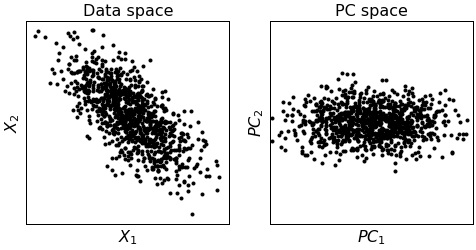

In [44]:
## now for PCA

# PCA using scikitlearn's function
pca = PCA().fit(y)

# get the PC scores
pcscores = pca.transform(y)


# and plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(y[:,0],y[:,1],'k.')
ax[0].axis('square')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$')
ax[0].set_title('Data space')

ax[1].plot(pcscores[:,0],pcscores[:,1],'k.')
ax[1].axis('square')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[1].set_xlabel('$PC_1$')
ax[1].set_ylabel('$PC_2$')
ax[1].set_title('PC space')

plt.show()


In [45]:
## for dimension reduction

spikes = np.loadtxt('spikes.csv',delimiter=',')


# let's see it!
plt.plot(np.mean(spikes,axis=0))
plt.title('Average of all spikes')
plt.show()

plt.imshow(spikes,aspect='auto')
plt.xlabel('Time points')
plt.ylabel('Individual spikes')
plt.show()

OSError: spikes.csv not found.

In [ ]:
## pca

# PCA using scikitlearn's function
pca = PCA().fit(spikes)

# get the PC scores and the eigenspectrum
pcscores = pca.transform(spikes)
explVar = pca.explained_variance_
explVar = 100*explVar/sum(explVar) # convert to %total
coeffs  = pca.components_


# show the scree plot (a.k.a. eigenspectrum)
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(explVar,'kp-',markerfacecolor='k',markersize=10)
ax[0].set_xlabel('Component number')
ax[0].set_ylabel('Percent variance explained')

ax[1].plot(np.cumsum(explVar),'kp-',markerfacecolor='k',markersize=10)
ax[1].set_xlabel('Component number')
ax[1].set_ylabel('Cumulative percent variance explained')
plt.show()

# now show the PC weights for the top two components
plt.plot(coeffs[0,:])
plt.plot(coeffs[1,:])
plt.xlabel('Time')
plt.legend(('Comp 1','Comp 2'))
plt.title('PC weights (coefficients)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
 
# data from PCA
data = np.vstack((pcscores[:,0], pcscores[:,1])).T
 
# KMeans classification
k = 2 # how many clusters?
km = KMeans(n_clusters=k).fit(data)
# group labels
groupidx = km.predict(data)
# centroids
cents = km.cluster_centers_
 
# generate color_map, and averges of each class based on KMeans classification
groupidx_color=[]
counter = 0
class_0 = 0
class_1 = 0
for i in range(len(groupidx)):
    if groupidx[i] == 0:
        groupidx_color.append('r')
        class_0 += spikes[i]
        counter+=1
    else:
        groupidx_color.append('g')
        class_1 += spikes[i]
 
#Normalize classes
class_0 = class_0 / counter
class_1 = class_1 / (len(groupidx) - counter)
 
 
#ploting
plt.scatter(pcscores[:,0],pcscores[:,1],c=groupidx_color, s=0.01)
plt.plot(cents[:1,0],cents[:1,1],'bo')
plt.plot(cents[1:,0],cents[1:,1],'ko')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('KMeans Classification on PCA space')
plt.show()
 
plt.plot(class_0,'go-', label = 'time class_0')
plt.plot(class_1,'ro-', label = 'time class_1')
plt.xlabel('Time points')
plt.title('Averge of each time class')
plt.legend()
plt.show()

In [ ]:
# Unsuprvised learning
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k)
data = np.transpose([pcscores[:,0], pcscores[:,1]])
kmeans = kmeans.fit(data)
cents = kmeans.cluster_centers_
 
# Plotting
y_pred = kmeans.fit_predict(data)
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(data[:, 0], data[:, 1], c=y_pred, s=.1)
plt.plot(cents[:,0],cents[:,1],'ko')
plt.title("K-means on PC data")
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [ ]:
plt.plot(spikes[y_pred==0].mean(axis=0), label='cluster 1')
plt.plot(spikes[y_pred==1].mean(axis=0), label='cluster 2')
plt.title('Average of all spikes by cluster')
plt.legend()
plt.show()

# 9. ICA

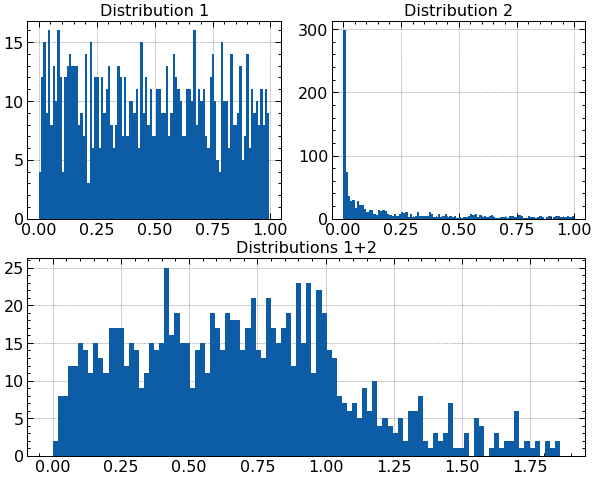

In [46]:
## Create the data

#number of data points
N = 1000

#a non-Gaussian distribution
dist1 = np.random.rand(N)

# another non-Gaussian distribution
dist2 = np.random.rand(N)**4


# setup the figure
fig = plt.figure(constrained_layout=False,figsize=(10,8))
axs = fig.add_gridspec(2,2)


# individual distributions
ax1 = fig.add_subplot(axs[0,0])
ax1.hist(dist1,100)
ax1.set_title('Distribution 1')

ax2 = fig.add_subplot(axs[0,1])
ax2.hist(dist2,100)
ax2.set_title('Distribution 2')

# and their summed histogram
ax3 = fig.add_subplot(axs[1,:])
ax3.hist(dist1+dist2,100)
ax3.set_title('Distributions 1+2')

plt.show()

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


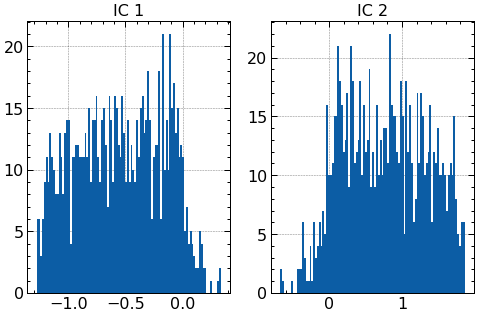

In [47]:
## ICA

# two non-Gaussian distributions
data = np.vstack((.4*dist1+.3*dist2, .8*dist1-.7*dist2))

# ICA and scores
fastica = FastICA(max_iter=10000,tol=.0000001)
b = fastica.fit_transform(data)
iscores = b@data


# plot distributions

# IC 1
fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].hist(iscores[0,:],100)
ax[0].set_title('IC 1')

# IC 2
ax[1].hist(iscores[1,:],100)
ax[1].set_title('IC 2')


plt.show()

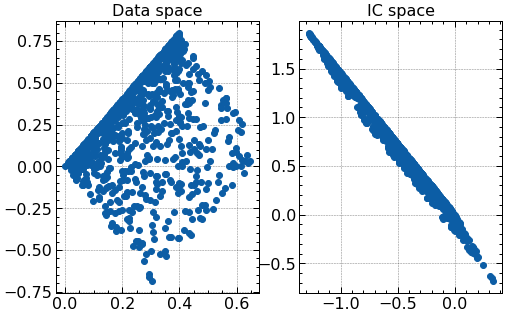

In [48]:
## look at the data in data space and IC space

fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(data[0,:],data[1,:],'o')
ax[0].set_title('Data space')

ax[1].plot(iscores[0,:],iscores[1,:],'o')
ax[1].set_title('IC space')
plt.show()

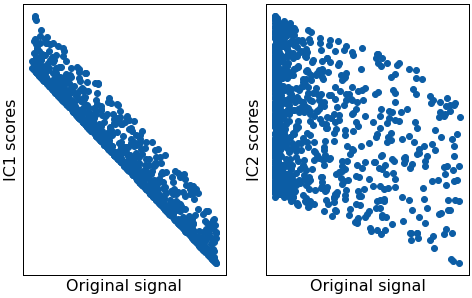

In [49]:
## show that the original data match the ICs

# now plot data as a function of ICs
fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].plot(dist1,iscores[0,:],'o')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Original signal')
ax[0].set_ylabel('IC1 scores')

ax[1].plot(dist2,iscores[1,:],'o')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('Original signal')
ax[1].set_ylabel('IC2 scores')
plt.show()

# 10. Dprime

In [50]:
## example from the slides

# step 1
hitP = 22/30
faP  =  3/30

# step 2
hitZ = stats.norm.ppf(hitP)
faZ  = stats.norm.ppf(faP)

# step 3
dPrime = hitZ-faZ

print(dPrime)


1.9044772887546881


In [51]:
## failure scenarios and their resolutions

hitZ = stats.norm.ppf(3/30)
faZ  = stats.norm.ppf(22/30)

print(hitZ-faZ)

-1.9044772887546881


C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\3391374789.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


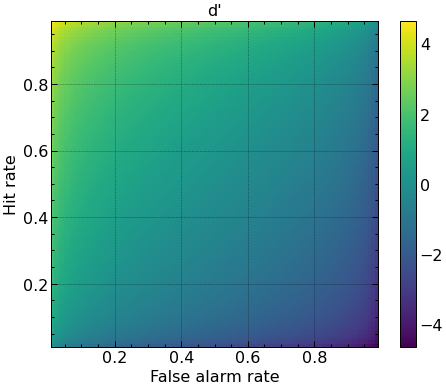

In [52]:
## 2D d' space

# response probabilities
x  = np.arange(.01,1,.01)

# generate the space using tile expansion
dp = np.tile(stats.norm.ppf(x),(99,1)).T - np.tile(stats.norm.ppf(x),(99,1))


# show the 2D d' space
plt.imshow(dp,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
plt.xlabel('False alarm rate')
plt.ylabel('Hit rate')
plt.title("d'")
plt.colorbar()
plt.show()

# 11. Response Bias

In [53]:
# example from the slides

# step 1
hitP = 22/30
faP  =  3/30

# step 2
hitZ = stats.norm.ppf(hitP)
faZ  = stats.norm.ppf(faP)

# step 3
respBias = -(hitZ+faZ)/2

print(respBias)

0.32931292116725636


C:\Users\Kevin\AppData\Local\Temp\ipykernel_8524\1526600053.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


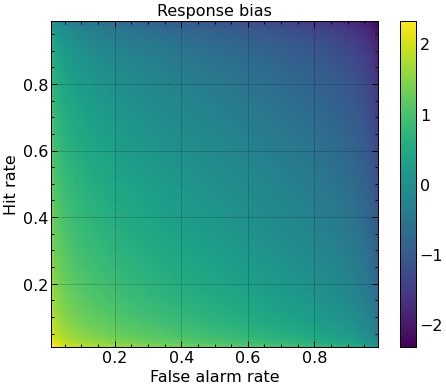

In [54]:
## 2D bias space

# response probabilities
x  = np.arange(.01,1,.01)

# generate the space using tile expansion
rb = -( np.tile(stats.norm.ppf(x),(99,1)).T + np.tile(stats.norm.ppf(x),(99,1)) )/2


# show the 2D response bias space
plt.imshow(rb,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
plt.xlabel('False alarm rate')
plt.ylabel('Hit rate')
plt.title('Response bias')
plt.colorbar()
plt.show()

# 12. F Score


In [55]:

# number of 'trials' in the experiment
N = 50 # actual trials is 2N

# number of experiment repetitions
numExps = 10000

# initialize
Fscores     = np.zeros(numExps)
dPrimes     = np.zeros(numExps)
specificity = np.zeros(numExps)


### run the experiment!
for expi in range(numExps):
    
    # generate data
    H = np.random.randint(1,N)  # hits
    M = N-H                     # misses
    CR = np.random.randint(1,N) # correct rejections
    FA = N-CR                   # false alarms
    
    # Fscore
    Fscores[expi] = H / (H+(FA+M)/2)
    
    # specificity
    specificity[expi] = CR/(CR+FA)
    
    # d'
    dPrimes[expi] = stats.norm.ppf(H/N) - stats.norm.ppf(FA/N)
    
    
    # not used here...
    precision = H/(H+FA)
    recall    = H/(H+M)

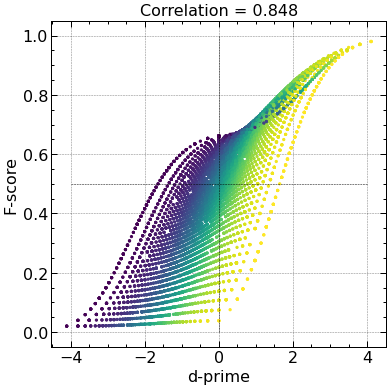

In [56]:
## let's see how they relate to each other!

fig = plt.subplots(1,figsize=(6,6))

plt.scatter(dPrimes,Fscores,s=5,c=specificity)
plt.plot([-4,4],[.5,.5],'k--',linewidth=.5)
plt.plot([0,0],[0,1],'k--',linewidth=.5)
plt.xlabel('d-prime')
plt.ylabel('F-score')
plt.title('Correlation = %g' %np.round(np.corrcoef(Fscores,dPrimes)[1,0],3))

plt.show()

# 13. ROC

In [57]:
## first, re-create the dp and rb matrices from previous lectures

x  = np.arange(.01,1,.01)
dp = np.tile(stats.norm.ppf(x),(99,1)).T - np.tile(stats.norm.ppf(x),(99,1))
rb = -( np.tile(stats.norm.ppf(x),(99,1)).T + np.tile(stats.norm.ppf(x),(99,1)) )/2

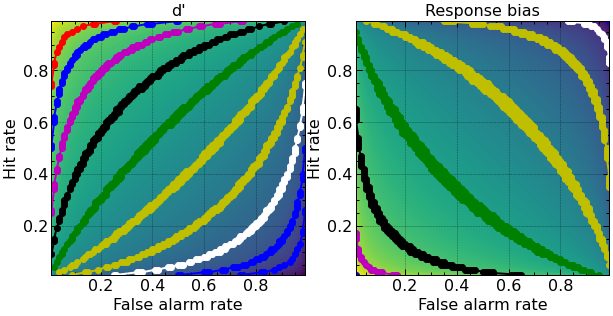

In [58]:
## create the 2D bias spaces and plot their ROC curves

rb2plot = np.linspace(3,-3, 10) # d'/bias levels 
tol = .031 # tolerance for matching levels
colorz = 'rbmkgyywbbbbbb'

# setup the figure
fig,ax = plt.subplots(1,2,figsize=(10,5))

# show the 2D spaces
ax[0].imshow(dp,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
ax[0].set_xlabel('False alarm rate')
ax[0].set_ylabel('Hit rate')
ax[0].set_title("d'")

ax[1].imshow(rb,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
ax[1].set_xlabel('False alarm rate')
ax[1].set_ylabel('Hit rate')
ax[1].set_title('Response bias')



### now draw the isocontours
for i in range(len(rb2plot)):
    
    # find d' points
    idx = np.where((dp>rb2plot[i]-tol) & (dp<rb2plot[i]+tol))
    ax[0].plot(x[idx[1]],x[idx[0]],'o-',color=colorz[i])
    
    # find bias points
    idx = np.where((rb>rb2plot[i]-tol) & (rb<rb2plot[i]+tol))
    ax[1].plot(x[idx[1]],x[idx[0]],'o-',color=colorz[i])


plt.show()